__<font size ="5">dividing and moving datas(train->val, train->test etc)__

In [103]:
from random import shuffle
from os import listdir, rename, remove
from os.path import isfile, join, exists
from copy import deepcopy
import shutil

def check_overlab_string(str):
    list_name = ['DeepFake', 'Face2Face', 'FaceSwap', 'NeuralTextures']
    for nm in list_name:
        if str.count(nm)>=2 : return True
    return False

def check_num(src_dir,dest_dir):
    print("src_dir's num",len(listdir(src_dir)))
    print("dest_dir's num",len(listdir(dest_dir)))
    
def all_text_files_in_dir(mypath):
        onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(".png")]
        return onlyfiles
    
def move_files_shuffle(src_dir,dest_dir,num_move=-1):
    files = all_text_files_in_dir(src_dir)
    shuffle(files)
    print("dest_dir's num",len(listdir(dest_dir)))
    print("src_dir's num",len(listdir(src_dir)))
#     num_curr_files = len(listdir(dest_dir))
    num_curr_files=0
    for new_file in files:
        print("d")
        if num_curr_files == num_move :break
        try:
            shutil.move(new_file,dest_dir)
            num_curr_files+=1
        except:pass
    print("result------------")
    print("dest_dir's num",len(listdir(dest_dir)))
    print("src_dir's num",len(listdir(src_dir)))
        
def copy_files_shuffle(src_dir,dest_dir,num_move=-1):
    files = all_text_files_in_dir(src_dir)
    shuffle(files)
    print("dest_dir's num",len(listdir(dest_dir)))
    print("src_dir's num",len(listdir(src_dir)))
#     num_curr_files = len(listdir(dest_dir))
    num_curr_files=0
    if not exists(dest_dir):
        os.mkdir(dest_dir)
        print(dest_dir)
    for new_file in files: 
        if num_curr_files == num_move :break
        try:
            shutil.copy(new_file,dest_dir)
            num_curr_files+=1
        except:
            pass
    print("result------------")
    print("dest_dir's num",len(listdir(dest_dir)))
    print("src_dir's num",len(listdir(src_dir)))

#파일 첫글자(first_title)가 동일한 모든 파일들을 dest_dir로 move
#limited_file = dest_dir 내 제한 갯수
def move_files_same_title(src_dir,dest_dir,first_title,split_char,limited_file=-1):
    while(True): #temp
        print("dest_dir's num",len(listdir(dest_dir)))
        print("src_dir's num",len(listdir(src_dir)))
        
        files = listdir(src_dir)
        if(len(listdir(dest_dir))>=limited_file and limited_file != -1):
            print("limited")
            return
        num_curr_files = len(listdir(dest_dir))
        num_moved_files=0
        import os
        for new_file in files:
            if(new_file.split(split_char)[0]==first_title):
                _moved = os.path.join(src_dir,new_file)
                num_moved_files+=1
                shutil.move(_moved,dest_dir)
            num_moved_files+= 1 if (new_file.split(split_char)[0]==first_title) else 0
        print("moved file num = {}".format(num_moved_files))
#         if(num_moved_files==0 or limited_file == -1) : break
        first_title = str(int(first_title) + 1)
        
    print("-------------------------------------------")
    print("Final dest_dir's num",len(listdir(dest_dir)))
    print("Final src_dir's num",len(listdir(src_dir)))

In [106]:
import os
import torch
import numpy as np
import random
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
device = torch.device(f"cuda" if torch.cuda.is_available() else "cpu")
##----------------
def set_seeds(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False # for faster training, but not deterministic

set_seeds(seed=42)    


In [199]:
import os
import glob
l_fakelreal = glob.glob('/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/*')
l_actors = glob.glob(os.path.join(l_fakelreal[1],'*')) #얘는 고정
for t in l_actors:
    actor = t.split('/')[-1]
    _name_folder=os.path.join('/media/data1/sha/CLRNet/TransferLearning/CelebDF_custum/train/fake',actor)
    if not exists(_name_folder):
        print(f'made as {_name_folder}')
        os.mkdir(_name_folder)
for act in l_actors:
    l_paths = glob.glob(os.path.join(act,'*'))
    title=[]
    print(glob.glob(l_paths[0]))
    len_paths = len(l_paths)
    print(f'len l_paths is {len(l_paths)}')
    n_interver = round(len(l_paths)/80)
    print(f'len l_paths//80 is {n_interver}')
#     print(l_paths)
    l_paths.sort()
    for i in range(0,len(l_paths),n_interver):
        title.append(l_paths[i])

    for t in title:
        actor = t.split('/')[-2]
        _name_folder=os.path.join('/media/data1/sha/CLRNet/TransferLearning/CelebDF_custum/train/fake',actor)
        shutil.copy(t,_name_folder)
        

['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Chris Evans/id4_id1_0003_0000167.png']
len l_paths is 11200
len l_paths//80 is 140
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Brad Pitt/id1_id9_0009_0000215.png']
len l_paths is 12240
len l_paths//80 is 153
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Amir Khan/id0_id4_0003_0000363.png']
len l_paths is 9120
len l_paths//80 is 114
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Angelina Jolie/id13_id7_0011_0000392.png']
len l_paths is 1680
len l_paths//80 is 21
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Cate Blanchett/id52_id58_0005_0000189.png']
len l_paths is 5759
len l_paths//80 is 72
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Chloe Grace Moretz/id55_id49_0000_0000289.png']
len l_paths is 5037
len l_paths//80 is 63
['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Carrie-Anne Moss/id57_id53_0004_0000208.png']
len l_paths is 

In [207]:
l_actors

['/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Chris Evans',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Brad Pitt',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Amir Khan',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Angelina Jolie',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Cate Blanchett',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Chloe Grace Moretz',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Carrie-Anne Moss',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Ben Affleck',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Chris Hemsworth',
 '/media/data1/sha/CLRNet/TransferLearning/CelebDF/train/fake/Cameron Diaz']

# Walk Function Example

In [9]:
import os

temp = "/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/"
for root, dirs, files in os.walk(temp): # root => 현재 탐색중인 path(string형) / dirs => root의 하위 폴더 리스트(list형) / files => root의 하위 파일 리스트(list형) / 
#     print(dirs)
    if not dirs:
        print(root)
        print(files)
        print('-------------------------')


/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/GENERAL_NOBRIGHT
['Face2Face_NeuralTextures_sha_LQHQ_littleaug_GENERAL_NOBRIGHT_nobright.txt', 'GENERAL_NOBRIGHT_epoch_.pth.tar']
-------------------------
/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/FReTAL_NOBRIGHT/.ipynb_checkpoints
['DeepFake_Face2Face_sha_LQHQ_littleaug_FReTAL_NOBRIGHT_nobright-checkpoint.txt']
-------------------------
/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/KD_HQ
['KD_HQ_epoch_.pth.tar', 'Face2Face_NeuralTextures_sha_LQHQ_littleaug_KD_HQ.txt']
-------------------------
/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/TGD_HQ_BRIGHT
['Face2Face_NeuralTextures_sha_LQHQ_littleaug_TGD_HQ_nobright.txt', 'TGD_HQ_epoch_.pth.tar']
-------------------------
/home/mhkim/CoReD/current_train_with_shadata/Face2Face_NeuralTextures/GENERAL_HQ
['GENERAL_HQ_epoch_.pth.tar', 'Face2Face_NeuralTextures_sha_LQHQ_littleaug_GENERAL_HQ_nobrigh

In [241]:
l_fakelreal[1].split('/')[-1]

'fake'

## Validation dataset(custum) 반복문 이용해서 한꺼번에 구축

In [258]:
import math
# for i_rf in range(len(l_fakelreal)):
l_fakelreal = glob.glob('/media/data1/sha/CLRNet/CelebDF/val/*')
i_rf = 1
l_actors = glob.glob(os.path.join(l_fakelreal[i_rf],'*')) #얘는 고정 -----> 0 : real | 1 : fake
print(l_actors)
name_folder=[]
for i in range(len(l_actors)):
    act = l_actors[i]
    actor = act.split('/')[-1]
    _name_folder=os.path.join('/media/data1/sha/CLRNet/CelebDF_custum/val/'+l_fakelreal[i_rf].split('/')[-1],actor)
    if not exists(_name_folder):
        print(f'made as {_name_folder}')
        os.mkdir(_name_folder)
    name_folder.append(_name_folder)

    l_paths = glob.glob(os.path.join(act,'*'))
    len_paths = len(l_paths)
    print(f'len l_paths is {len(l_paths)}')
    n_interver = round(len(l_paths)/800)
    print(f'len l_paths//800 is {n_interver}')

    title=[] #interver path만 append
    for i in range(0,len(l_paths),n_interver):
        title.append(l_paths[i])
    print(f'title num is {len(title)}')
    title.sort()

    for t in title:
        actor = t.split('/')[-2]
        _name_folder=os.path.join('/media/data1/sha/CLRNet/CelebDF_custum/val/'+l_fakelreal[i_rf].split('/')[-1],actor)
#         shutil.copy(t,_name_folder)


['/media/data1/sha/CLRNet/CelebDF/val/fake/Kate Winslet', '/media/data1/sha/CLRNet/CelebDF/val/fake/Gerard Butler', '/media/data1/sha/CLRNet/CelebDF/val/fake/Don Cheadle', '/media/data1/sha/CLRNet/CelebDF/val/fake/Natalie Portman', '/media/data1/sha/CLRNet/CelebDF/val/fake/Charlize Theron', '/media/data1/sha/CLRNet/CelebDF/val/fake/Ryan Reynolds', '/media/data1/sha/CLRNet/CelebDF/val/fake/Jason Statham', '/media/data1/sha/CLRNet/CelebDF/val/fake/John Travolta', '/media/data1/sha/CLRNet/CelebDF/val/fake/Will Ferrell']
len l_paths is 5680
len l_paths//800 is 7
title num is 812
len l_paths is 6960
len l_paths//800 is 9
title num is 774
len l_paths is 1200
len l_paths//800 is 2
title num is 600
len l_paths is 5680
len l_paths//800 is 7
title num is 812
len l_paths is 6960
len l_paths//800 is 9
title num is 774
len l_paths is 12560
len l_paths//800 is 16
title num is 785
len l_paths is 6320
len l_paths//800 is 8
title num is 790
len l_paths is 16400
len l_paths//800 is 20
title num is 820
l

In [253]:
acts = glob.glob('/media/data1/sha/CLRNet/CelebDF_custum/val/fake/*')
sum_f = 0
for i in range(len(acts)):
    files = glob.glob(acts[i]+'/*')
    sum_f += (len(files))
print(sum_f)

6992


In [279]:
l_fakelreal = glob.glob('/media/data1/sha/CLRNet/CelebDF/val/*')
l_actors = glob.glob(os.path.join(l_fakelreal[1],'*')) #얘는 고정 -----> 0 : real | 1 : fake
print(l_actors)
name_folder=[]
act = l_actors[-1]
actor = act.split('/')[-1]
_name_folder=os.path.join('/media/data1/sha/CLRNet/CelebDF_custum/val/fake',actor)
if not exists(_name_folder):
    print(f'made as {_name_folder}')
    os.mkdir(_name_folder)
name_folder.append(_name_folder)

l_paths = glob.glob(os.path.join(act,'*'))
# print(l_paths)

len_paths = len(l_paths)
print(f'len l_paths is {len(l_paths)}')
n_interver = int(len(l_paths)/800)
print(f'len l_paths//1000 is {n_interver}')

title=[] #interver path만 append
for i in range(0,len(l_paths),n_interver):
    title.append(l_paths[i])
print(f'title num is {len(title)}')
# title.sort()
random.shuffle(title)
cnt_temp = 0
for t in title:
    if cnt_temp > 1 : break
    cnt_temp += 1
    actor = t.split('/')[-2]
    _name_folder=os.path.join('/media/data1/sha/CLRNet/CelebDF_custum/val/fake',actor)
    shutil.copy(t,_name_folder)


['/media/data1/sha/CLRNet/CelebDF/val/fake/Kate Winslet', '/media/data1/sha/CLRNet/CelebDF/val/fake/Gerard Butler', '/media/data1/sha/CLRNet/CelebDF/val/fake/Don Cheadle', '/media/data1/sha/CLRNet/CelebDF/val/fake/Natalie Portman', '/media/data1/sha/CLRNet/CelebDF/val/fake/Charlize Theron', '/media/data1/sha/CLRNet/CelebDF/val/fake/Ryan Reynolds', '/media/data1/sha/CLRNet/CelebDF/val/fake/Jason Statham', '/media/data1/sha/CLRNet/CelebDF/val/fake/John Travolta', '/media/data1/sha/CLRNet/CelebDF/val/fake/Will Ferrell']
len l_paths is 12560
len l_paths//1000 is 15
title num is 838


## Quality 변경

In [311]:
from PIL import Image
img = Image.Image()
from_name_files = glob.glob('/media/data1/sha/CLRNet/CelebDF_custum/val/real/*')
print(from_name_files)


['/media/data1/sha/CLRNet/CelebDF_custum/val/real/Kate Winslet', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Gerard Butler', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Don Cheadle', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Natalie Portman', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Charlize Theron', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Ryan Reynolds', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Jason Statham', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/John Travolta', '/media/data1/sha/CLRNet/CelebDF_custum/val/real/Will Ferrell']


In [317]:
for n in from_name_files:
    from_titles = glob.glob(n + '/*')
    print(n)
    for t in from_titles:
#         print(t.split('/')[-1])
        img = Image.open(t)
        img.save((t.replace('CLRNet','CLRNet_jpg25/CLRNet')).replace('png', 'jpg'), format='JPEG', quality=25)
    print('DONE ! ')


/media/data1/sha/CLRNet/CelebDF_custum/val/real/Kate Winslet
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Gerard Butler
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Don Cheadle
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Natalie Portman
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Charlize Theron
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Ryan Reynolds
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Jason Statham
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/John Travolta
DONE ! 
/media/data1/sha/CLRNet/CelebDF_custum/val/real/Will Ferrell
DONE ! 


In [334]:
l_fakelreal = glob.glob('/media/data1/sha/CLRNet/TransferLearning/CelebDF_custum/train/*')
l_actors = glob.glob(os.path.join(l_fakelreal[1],'*')) #얘는 고정 -----> 0 : real | 1 : fake\
l_new_actors = []
for _actor in l_actors:
    paths = glob.glob(_actor+'/*')
    for p in paths:
        img = Image.open(p)
        img.save(p.replace('CLRNet','CLRNet_jpg25/CLRNet').replace('png','jpg'),format='JPEG', quality=25)
    print('DONE ! ')

DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 
DONE ! 


### 폴더가 없으면 자동으로 폴더 생성

In [315]:
l_fakelreal = glob.glob('/media/data1/sha/CLRNet/CelebDF/val/*')
l_actors = glob.glob(os.path.join(l_fakelreal[0],'*')) #얘는 고정 -----> 0 : real | 1 : fake
for _actor in l_actors:
    new_path = _actor.replace('CLRNet','CLRNet_jpg25/CLRNet')
    new_path = new_path.replace('CelebDF','CelebDF_custum')
    print(new_path)
    if not os.path.exists(new_path):
        os.makedirs(new_path)

/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Kate Winslet
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Gerard Butler
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Don Cheadle
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Natalie Portman
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Charlize Theron
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Ryan Reynolds
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Jason Statham
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/John Travolta
/media/data1/sha/CLRNet_jpg25/CLRNet/CelebDF_custum/val/real/Will Ferrell


In [273]:
move_files_same_title("/home/mhkim/ForensicImageData/neural/train/0",'/home/mhkim/ForensicImageData/neural/test/0','500','_',13000)
# move_files_same_title("/home/mhkim/ForensicImageData/Face2Face/train/1",'/home/mhkim/ForensicImageData/Face2Face/val/1','400','_')
# move_files_same_title("/home/mhkim/ForensicImageData/Face2Face/train/1",'/home/mhkim/ForensicImageData/Face2Face/val/1','300','_')
# move_files_same_title("/home/mhkim/ForensicImageData/Face2Face/train/1",'/home/mhkim/ForensicImageData/Face2Face/val/1','200','_')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mhkim/ForensicImageData/neural/test/0'

In [39]:
check_num('/home/mhkim/ForensicImageData/Deepfakes/faceswap_6000/0','/home/mhkim/ForensicImageData/Deepfakes/faceswap_6000/1')
check_num('/home/mhkim/ForensicImageData/faceswap/deepfakes_6000/0','/home/mhkim/ForensicImageData/faceswap/deepfakes_6000/1')
check_num('/home/mhkim/ForensicImageData/faceswap/face2face_2000_train/0','/home/mhkim/ForensicImageData/faceswap/face2face_2000_train/1')

src_dir's num 6000
dest_dir's num 6000
src_dir's num 6000
dest_dir's num 6000
src_dir's num 2000
dest_dir's num 2000
-----------------------


In [8]:
copy_files_shuffle("/home/mhkim/ForensicImageData/faceswap/train/1",'/home/mhkim/ForensicImageData/Deepfakes/faceswap_500/1',4000)

dest_dir's num 0
src_dir's num 20221
result------------
dest_dir's num 500
src_dir's num 20221


__<font size ="5">only move datas__

In [39]:
import shutil
shutil.move("/home/mhkim/deepfake_detection/deepfakes/train/0","/home/mhkim/deepfake_detection/deepfakes/train_resi/0",10000)

'/home/mhkim/deepfake_detection/Face2Face/train_resi/1/1'

__<font size ="5">showing numpy & Show ACC,VAL Graph__

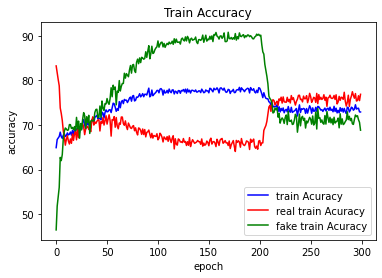

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# acc_ax = loss_ax.twinx()
loss_ax.plot(data1[0], 'b', label='train Acuracy')
loss_ax.plot(data1[1], 'r', label='real train Acuracy')
loss_ax.plot(data1[2], 'g', label='fake train Acuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')
loss_ax.set_title('Train Accuracy')

loss_ax.legend(loc='lower right')

plt.show()

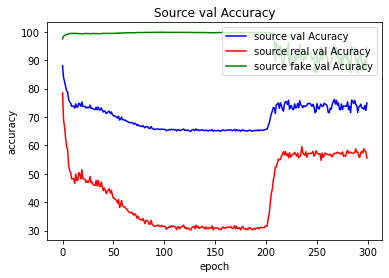

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(data2[0][0], 'b', label='source val Acuracy')
loss_ax.plot(data2[1][0], 'r', label='source real val Acuracy')
loss_ax.plot(data2[2][0], 'g', label='source fake val Acuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')
loss_ax.set_title('Source val Accuracy')
loss_ax.legend(loc='upper right')
plt.show()

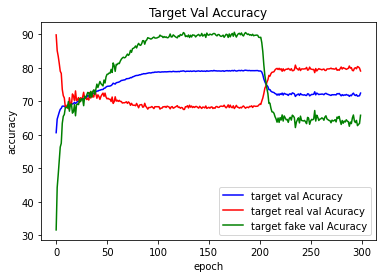

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(data2[0][1], 'b', label='target val Acuracy')
loss_ax.plot(data2[1][1], 'r', label='target real val Acuracy')
loss_ax.plot(data2[2][1], 'g', label='target fake val Acuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')
loss_ax.set_title('Target Val Accuracy')
loss_ax.legend(loc='lower right')
plt.show()

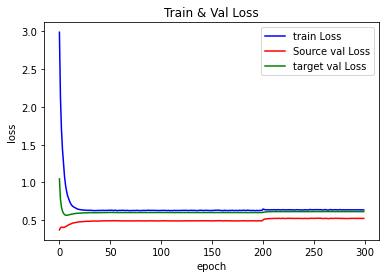

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(data1[3], 'b', label='train Loss')
loss_ax.plot(data2[3][0], 'r', label='Source val Loss')
loss_ax.plot(data2[3][1], 'g', label='target val Loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')
loss_ax.set_title('Train & Val Loss')
plt.show()

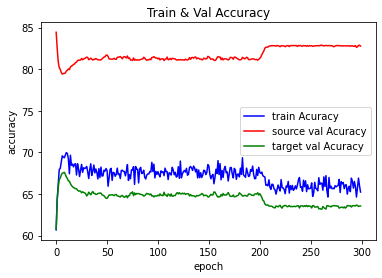

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

# acc_ax = loss_ax.twinx()

loss_ax.plot(data1[0], 'b', label='train Acuracy')
loss_ax.plot(data2[0][0], 'r', label='source val Acuracy')
loss_ax.plot(data2[0][1], 'g', label='target val Acuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')
loss_ax.set_title('Train & Val Accuracy')
loss_ax.legend(loc='center right')
plt.show()

__<font size ="5">Checking same named file in checked_files__

In [72]:
from os import listdir, rename, remove
checked_files = listdir("/media/data1/hsm/deepfake_detection/Face2Face/train/1/")
print(len(checked_files))
source_files = listdir("/media/data1/hsm/deepfake_detection/FaceSwap/train/1/")

cnt=0
for f in checked_files :
    if f in source_files:
        cnt+=1
#         print("checked_file is in source_files")

91690


KeyboardInterrupt: 

In [166]:
print (cnt)

8982
